# VAEX to the rescue

VAEX works out of core and does not load / compute anything, unless specifically asked to.

In [1]:
import vaex
import pandas as pd
import numpy as np

In [2]:
#opens directories of parquet files

In [3]:
%%time

df=vaex.open("data/clean/TRTH/equities/events/US/events/SPY.P/2010*arrow")
df

CPU times: user 789 ms, sys: 295 ms, total: 1.08 s
Wall time: 1.58 s


#,trade_price,trade_volume,bid-price,bid-volume,ask-price,ask-volume,index
0,nan,nan,112.36,25.0,112.37,18.0,2010-01-04 14:30:00.000999936
1,nan,nan,112.36,38.0,112.37,16.0,2010-01-04 14:30:00.010999808
2,nan,nan,112.36,40.0,112.37,16.0,2010-01-04 14:30:00.042999552
3,nan,nan,112.36,47.0,112.37,14.0,2010-01-04 14:30:00.052999936
4,nan,nan,112.36,47.0,112.37,22.0,2010-01-04 14:30:00.075000064
...,...,...,...,...,...,...,...
"101,320,446",nan,nan,125.79,612.0,125.8,32.0,2010-12-31 20:59:59.934000128
"101,320,447",nan,nan,125.79,718.0,125.8,32.0,2010-12-31 20:59:59.939999744
"101,320,448",nan,nan,125.79,704.0,125.8,32.0,2010-12-31 20:59:59.970999552
"101,320,449",nan,nan,125.79,689.0,125.8,32.0,2010-12-31 20:59:59.978000128


CPU times: user 3.89 s, sys: 1.7 s, total: 5.59 s
Wall time: 1.69 s


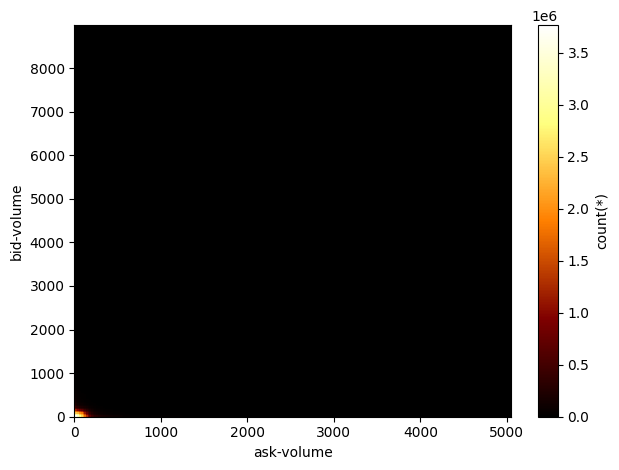

In [4]:
%%time
df.viz.heatmap("ask-volume","bid-volume")

One cannot see much because some rare values are very large. Let us therefore plot the log of these quantities

In [5]:
%%time
df["ask-logvolume"]=np.log(1+df['ask-volume'])
df["bid-logvolume"]=np.log(1+df['bid-volume'])

CPU times: user 2.11 ms, sys: 0 ns, total: 2.11 ms
Wall time: 2.13 ms


CPU times: user 13.6 s, sys: 2.12 s, total: 15.7 s
Wall time: 2.57 s


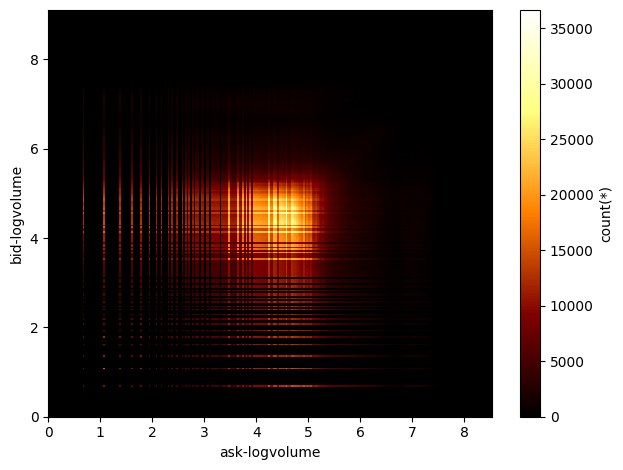

In [6]:
%%time
df.viz.heatmap("ask-logvolume","bid-logvolume")

In [7]:
%%time 
df['trade_volume'].value_counts()                        

CPU times: user 1.47 s, sys: 590 ms, total: 2.06 s
Wall time: 520 ms


NaN        92937681
100.0       1682966
200.0       1131932
300.0        636998
400.0        511613
             ...   
24597.0           1
24234.0           1
17247.0           1
27801.0           1
17852.0           1
Length: 18852, dtype: int64

In [8]:
df["mid"]=0.5*(df["ask-price"]+df["bid-price"])

df["s"]=2*(df.trade_price>df.mid)-1   # equivalent to np.sign, but VAEX does not support np.sign

It takes some times to actually read all the relevant parts of the file:

In [9]:
%%time
s=df["s"].to_numpy()


s=s[s!=0]
s=s-np.mean(s)
len(s)

CPU times: user 3.77 s, sys: 2.98 s, total: 6.75 s
Wall time: 2.94 s


101320451

In [10]:
from scipy.signal import correlate
import matplotlib.pyplot as plt

maxlag=10000

CPU times: user 20.8 s, sys: 8.72 s, total: 29.6 s
Wall time: 29.6 s


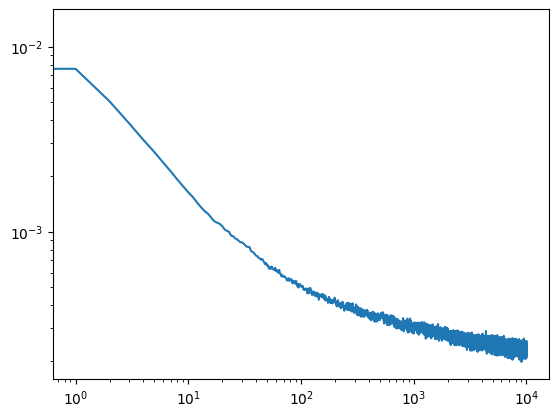

In [12]:
%%time

acf=correlate(s,s)/len(s)
acf=acf[:len(s)][::-1][1:(maxlag+1)]
plt.plot(acf)
plt.yscale("log")
plt.xscale("log")

The following is way too slow.

In [ ]:
%%time
#plt.acorr(s,maxlags=maxlag)
#plt.yscale("log")
#plt.xscale("log")